# 프로젝트 고양이 수염 스티커 만들기

In [1]:
import os
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np


## 1. 데이터 준비하기

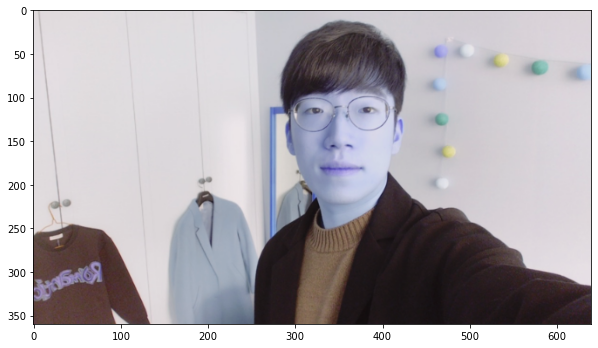

In [2]:
plt.figure(figsize=(10, 10))
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

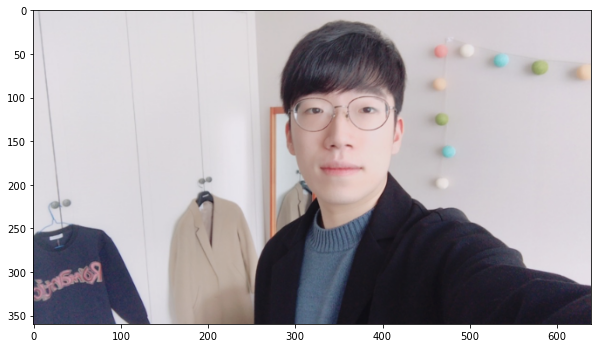

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
plt.figure(figsize=(10, 10))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. 얼굴 검출 face detection

In [4]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(270, 64) (425, 219)]]


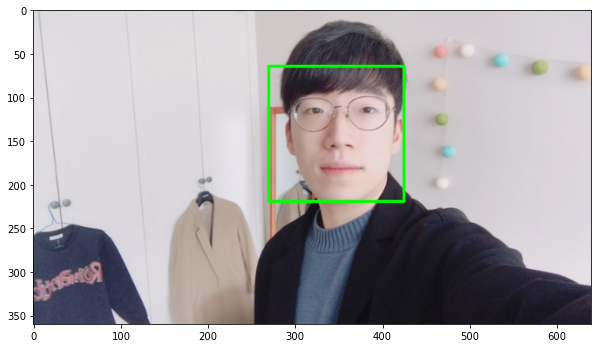

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.figure(figsize=(10, 10))
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 얼굴 랜드마크 face landmark

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


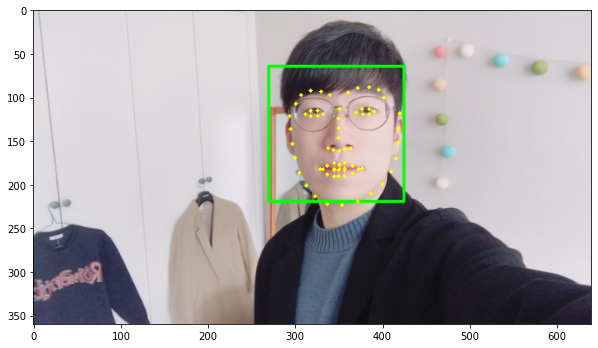

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

        
plt.figure(figsize=(10, 10))
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for landmark in list_landmarks:
    print(landmark)

[(294, 121), (295, 136), (297, 153), (300, 169), (305, 186), (313, 201), (323, 213), (337, 222), (354, 223), (372, 219), (387, 210), (400, 199), (410, 185), (416, 170), (418, 152), (419, 135), (420, 118), (301, 107), (307, 97), (318, 92), (330, 93), (340, 97), (361, 94), (372, 89), (385, 88), (396, 91), (402, 100), (351, 113), (350, 124), (350, 135), (350, 146), (338, 158), (344, 160), (351, 161), (357, 159), (364, 158), (312, 119), (318, 115), (326, 115), (332, 119), (326, 121), (318, 121), (370, 117), (377, 113), (385, 113), (391, 116), (385, 119), (378, 119), (329, 182), (337, 178), (345, 175), (351, 177), (357, 175), (366, 178), (377, 181), (366, 187), (357, 190), (350, 190), (345, 190), (337, 188), (332, 182), (345, 182), (351, 182), (357, 181), (373, 182), (357, 183), (350, 183), (345, 183)]


## 스티커 적용하기

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] #- dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(350, 146)
(x,y) : (350,146)
(w,h) : (156,156)


In [12]:
# 스티커 적용
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(156, 156, 3)


In [13]:
# 이미지 좌표 조정
refined_x = x - (w // 2)     # left
refined_y = y - (h // 2)     # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (272,68)


In [14]:
# img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(156, 156, 3)


In [15]:
# refined_y = 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (272,68)


In [16]:
# img_show

In [17]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# sticker_area = img_show[refined_x:refined_x+img_sticker.shape[0], refined_y:refined_y+img_sticker.shape[1]]

In [18]:
# img_sticker
sticker_area.shape

(156, 156, 3)

In [19]:
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker!=0, sticker_area,img_sticker).astype(np.uint8)

# img_show[refined_x:refined_x+img_sticker.shape[0], refined_y:refined_y+img_sticker.shape[1]] = \
# np.where(img_sticker!=0, sticker_area,img_sticker).astype(np.uint8)

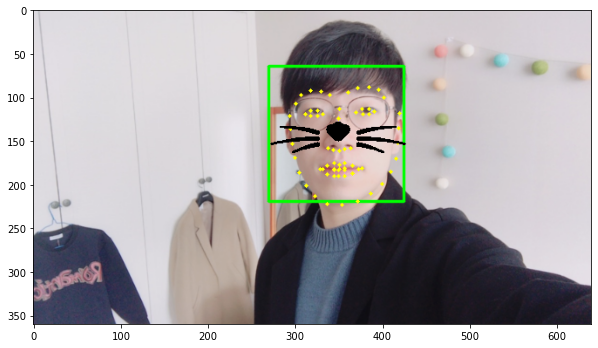

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

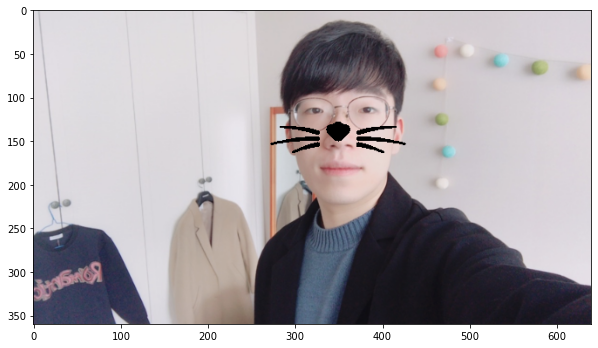

In [21]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()